In [ ]:
import numpy as np 
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
!ls "/content/drive/My Drive/Indian Liver patient dataset/indian_liver_patient.csv"

Mounted at /content/drive
'/content/drive/My Drive/Indian Liver patient dataset/indian_liver_patient.csv'


In [ ]:
df = pd.read_csv("/content/drive/My Drive/Indian Liver patient dataset/indian_liver_patient.csv")

In [ ]:
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [ ]:
import seaborn as sns
from matplotlib import pyplot as plt

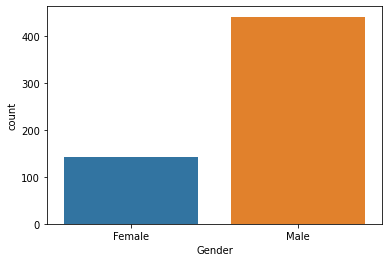

In [ ]:
sns.countplot(data=df, x='Gender');

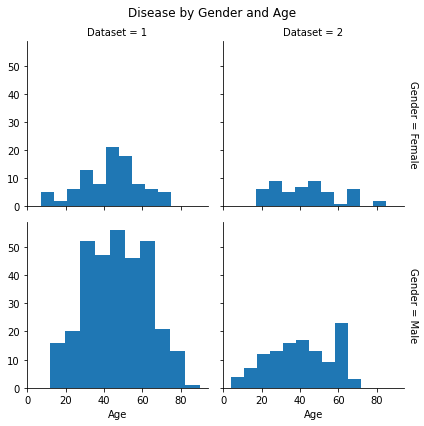

In [ ]:
g = sns.FacetGrid(df, col="Dataset", row="Gender", margin_titles=True)
g.map(plt.hist, "Age")
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Disease by Gender and Age');

In [ ]:
df.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

In [ ]:
df.Albumin_and_Globulin_Ratio.value_counts()

1.00    106
0.80     65
0.90     59
0.70     53
1.10     46
       ... 
0.88      1
1.02      1
1.09      1
0.89      1
1.36      1
Name: Albumin_and_Globulin_Ratio, Length: 69, dtype: int64

In [ ]:
df.Albumin_and_Globulin_Ratio.fillna(1.00,inplace=True)

In [ ]:
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()
df['Gender']=label.fit_transform(df['Gender'])

In [ ]:
from sklearn.model_selection import train_test_split
train, test= train_test_split(df,test_size=0.1,random_state=1)
def data_spliting(df):
    x=df.drop(['Dataset'],axis =1)
    y=df.Dataset
    return x,y
x_train,y_train=data_spliting(train)
x_test,y_test=data_spliting(test)

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

log_model=LogisticRegression()
log_model.fit(x_train, y_train)
prediction=log_model.predict(x_test)
score= accuracy_score(y_test, prediction)
print(score*100)

83.05084745762711


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
from sklearn.ensemble import RandomForestRegressor
regress = RandomForestRegressor()
regress.fit(x_train , y_train)
reg_train = regress.score(x_train , y_train)
reg_test = regress.score(x_test , y_test)
print(reg_train*100)

88.07547592621955
